In [1]:
import math
import numpy as np 
import matplotlib.pyplot as plt 
from numpy import random 
import sys
np.set_printoptions(threshold=sys.maxsize)

In [2]:
#initialize the values
N = 100
D = 1
dx = 1/N
w = 1.9
e = 10**(-5)
eta = 2
max_iter = (N*N)/2

In [3]:
def update_SOR(Y, w):
    '''
    The SOR method grid update function
    Args:
        -Y, the grid at the current timestep
        -w, the omega constant
        -N, the size of the grid
    Out:
        -Y, the grid at the next timestep
    '''
    #update the grid at position i, j and take boundary conditions into account
    for j in range(1, len(Y)-1):
        for i in range(len(Y)):
            if i == 0:
                 Y[j,i] = (1-w)*Y[j,i] + (w/4) * (Y[j+1,i] + Y[j-1,i] + Y[j,i+1] + Y[j,-1]) 
            elif i == N-1:
                 Y[j,i] = (1-w)*Y[j,i] + (w/4) * (Y[j+1,i] + Y[j-1,i] + Y[j,0] + Y[j,i-1]) 
            else:
                 Y[j,i] = (1-w)*Y[j,i] + (w/4) * (Y[j+1,i] + Y[j-1,i] + Y[j,i+1] + Y[j,i-1])  
            if Y[j,i]<0:
                Y[j,i] = 0
    return(Y)  

In [4]:
def init(N):
    '''
    Initialize a grid with all zeros except on the first row where the value is all ones
    Args:
        -N the size of the grid
    Out: the initial state of the grid
    '''
    k = 1
    Y = np.zeros((N,N))
    Y[0] = np.ones(N)
    Y_prev = np.copy(Y)
    Y = update_SOR(Y, w)
    #calculate the difference between the last two iterations
    diff = np.abs(Y - Y_prev)
    diff_val = (np.amax(diff))
    #until the differnce is smaller than epsilon, update the grid
    while(diff_val > e):
        k = k+1
        Y_prev = np.copy(Y)
        Y = update_SOR(Y, w)
        diff = np.abs(Y - Y_prev)
        diff_val = (np.amax(diff))
    return Y
grid = init(N)

In [5]:
def neighbours_function2(new_s, Y, neighbours):
    x = 0
    y = 1
    if int(new_s[y]) == 0:
        if int(new_s[x]) ==0:
            if Y[int(new_s[y]),int(new_s[x])+1]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[y]),int(new_s[x])+1]])
            if Y[int(new_s[y]),len(Y)-1]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[y]),len(Y)-1]])
            if Y[int(new_s[y]-1),int(new_s[x])]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[y]+1),int(new_s[x])]])

        elif int(new_s[x]) == len(Y)-1:
            if Y[int(new_s[y]),0]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[y]),0]])
            if Y[int(new_s[y]),int(new_s[x])-1]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[y]),int(new_s[x])-1]])
            if Y[int(new_s[y]+1),int(new_s[x])]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[y]+1),int(new_s[x])]])

        else:
            if Y[int(new_s[y]),int(new_s[x])-1]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[y]),int(new_s[x])-1]])
            if Y[int(new_s[y]),int(new_s[x])+1]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[y]),int(new_s[x])+1]])
            if Y[int(new_s[y]),int(new_s[x])]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[y]+1),int(new_s[x])]])

    elif int(new_s[x]) == 0:
            if Y[int(new_s[y]),int(new_s[x])+1]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[y]),int(new_s[x])+1]])
            if Y[int(new_s[y]),len(Y)-1]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[y]),len(Y)-1]])
            if Y[int(new_s[y])+1,int(new_s[x])]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[y])+1,int(new_s[x])]])
            if Y[int(new_s[y])-1,int(new_s[x])]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[y])-1,int(new_s[x])]])

    elif int(new_s[x]) == len(Y)-1:
            if Y[int(new_s[y]),int(new_s[x])-1]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[y]),int(new_s[x])-1]])
            if Y[int(new_s[y]),0]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[y]),0]])
            if Y[int(new_s[y])-1,int(new_s[x])]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[y])-1,int(new_s[x])]])
            if Y[int(new_s[y])+1,int(new_s[x])]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[y])+1,int(new_s[x])]])
       
    else:
        print(new_s)
        for i in [-1,1]:
            if Y[int(new_s[x])+i,int(new_s[y])]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[y]) ,int(new_s[x])+i ]])
            if Y[int(new_s[x]),int(new_s[y])+i]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[y])+i, int(new_s[x])]] )
    return neighbours


In [6]:
def neighbours_function(new_s, Y, neighbours):
    if int(new_s[0]) == 0:
        if int(new_s[1]) ==0:
            if Y[int(new_s[0]),len(Y)-1]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[0]),len(Y)-1]])
            if Y[int(new_s[0]),int(new_s[1])+1]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[0]),int(new_s[1])+1]])  
            if Y[int(new_s[0])+1,int(new_s[1])]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[0])+1,int(new_s[1])]])
        elif int(new_s[1]) == len(Y)-1:
            if Y[int(new_s[0]),int(new_s[1])-1]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[0]),int(new_s[1])-1]])
            if Y[int(new_s[0]),0]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[0]),0]])  
            if Y[int(new_s[0])+1,int(new_s[1])]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[0])+1,int(new_s[1])]])            
        else:
            if Y[int(new_s[0]),int(new_s[1])+1]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[0]),int(new_s[1])+1]])
            if Y[int(new_s[0]),int(new_s[1])-1]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[0]),int(new_s[1])-1]])  
            if Y[int(new_s[0])+1,int(new_s[1])]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[0])+1,int(new_s[1])]])
    elif int(new_s[1]) == 0:
        if Y[int(new_s[0]),len(Y)-1]!=0:
            neighbours = np.vstack([neighbours, [int(new_s[0]),len(Y)-1]])
        if Y[int(new_s[0]),new_s[1]+1]!=0:
            neighbours = np.vstack([neighbours, [int(new_s[0]),new_s[1]+1]])  
        if Y[int(new_s[0])-1,int(new_s[1])]!=0:
            neighbours = np.vstack([neighbours, [int(new_s[0])-1,int(new_s[1])]])
        if Y[int(new_s[0])+1,int(new_s[1])]!=0:
            neighbours = np.vstack([neighbours, [int(new_s[0])+1,int(new_s[1])]])
    elif int(new_s[1]) == len(Y)-1:
        if Y[int(new_s[0]),0]!=0:
            neighbours = np.vstack([neighbours, [int(new_s[0]),0]])
        if Y[int(new_s[0]),int(new_s[1])-1]!=0:
            neighbours = np.vstack([neighbours, [int(new_s[0]),int(new_s[1])-1]])  
        if Y[int(new_s[0])-1,int(new_s[1])]!=0:
            neighbours = np.vstack([neighbours, [int(new_s[0])-1,int(new_s[1])]])
        if Y[int(new_s[0])+1,int(new_s[1])]!=0:
            neighbours = np.vstack([neighbours, [int(new_s[0])+1,int(new_s[1])]])           
    else:
        for i in [-1,1]:
            if Y[int(new_s[0])+i,int(new_s[1])]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[0])+i,int(new_s[1])] ])
            if Y[int(new_s[0]),int(new_s[1])+i]!=0:
                neighbours = np.vstack([neighbours, [int(new_s[0]),int(new_s[1])+i]] )
    return neighbours


In [7]:
def growth(Y, seed, neighbours, eta):
    total = 0
    prop = []
    for s in seed:
        Y[int(s[0]),int(s[1])] = 0

    for n in neighbours:
        total += abs((Y[int(n[0]),int(n[1])])**eta)
        c_ij = (Y[int(n[0]),int(n[1])])**eta
        prop.append(abs(c_ij))
    prop = prop/total
    if total == 0:
        print(stop)

    test = Y<0

    index = random.choice(np.arange(len(neighbours)), p = prop)
    new_s = neighbours[index] 
    seed = np.vstack([seed, new_s])
    neighbours = np.delete(neighbours, index, axis = 0)
    neighbours =  neighbours_function(new_s, Y, neighbours)
    return Y, seed, neighbours


In [13]:
def itter(seed, Y, eta, max_iter, neighbours):
    for i in range(int(max_iter)):
        Y, seed, neighbours = growth(Y, seed, neighbours, eta)
        Y = update_SOR(Y, w)
    seed_grid = np.zeros((N,N))
    
    for i in seed:
        seed_grid[int(i[0]), int(i[1])]=1
    plt.imshow(seed_grid)
    plt.show()
    plt.imshow(Y)
    plt.show()
# Zorg dat wanneer je seed het platfond raakt hij niet verder groeit, anders neem hij heel de bovenkant over 
# we hebben nog steeds een afwijking naar rechts 

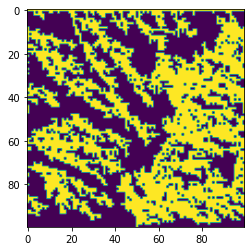

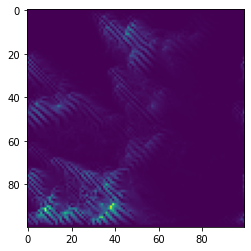

In [12]:
Y = np.copy(grid)
seed = np.array([[N-1,round((N-1)/2)]])
neighbours= np.array([[N-2, round((N-1)/2)], [round(N-1),round((N-1)/2)-1], [round(N-1),round((N-1)/2)+1]])
itter(seed, Y, 2, max_iter, neighbours)